In [1]:
from models import create_model



In [3]:
model = create_model('vit_lite')

In [4]:
print(model)

ViTLite(
  (tokenizer): Tokenizer(
    (conv_layers): Sequential(
      (0): Sequential(
        (0): Conv2d(3, 256, kernel_size=(4, 4), stride=(4, 4))
        (1): Identity()
        (2): Identity()
      )
    )
    (flattener): Flatten(start_dim=2, end_dim=3)
  )
  (classifier): Transformer(
    (dropout): Dropout(p=0.1, inplace=False)
    (blocks): ModuleList(
      (0): TransformerEncoder(
        (pre_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (self_attn): Attention(
          (qkv): Linear(in_features=256, out_features=768, bias=False)
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=256, out_features=256, bias=True)
          (proj_drop): Dropout(p=0.1, inplace=False)
        )
        (linear1): Linear(in_features=256, out_features=512, bias=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (linear2): Linear(in_features=512, ou

In [7]:
model.classifier.blocks = model.classifier.blocks[:6]

In [8]:
print(model)

ViTLite(
  (tokenizer): Tokenizer(
    (conv_layers): Sequential(
      (0): Sequential(
        (0): Conv2d(3, 256, kernel_size=(4, 4), stride=(4, 4))
        (1): Identity()
        (2): Identity()
      )
    )
    (flattener): Flatten(start_dim=2, end_dim=3)
  )
  (classifier): Transformer(
    (dropout): Dropout(p=0.1, inplace=False)
    (blocks): ModuleList(
      (0): TransformerEncoder(
        (pre_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (self_attn): Attention(
          (qkv): Linear(in_features=256, out_features=768, bias=False)
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=256, out_features=256, bias=True)
          (proj_drop): Dropout(p=0.1, inplace=False)
        )
        (linear1): Linear(in_features=256, out_features=512, bias=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (linear2): Linear(in_features=512, ou

In [10]:
import torch
model.load_state_dict(torch.load("../state_dicts/vit_lite_10.pt"))

RuntimeError: Error(s) in loading state_dict for ViTLite:
	Unexpected key(s) in state_dict: "classifier.blocks.6.pre_norm.weight", "classifier.blocks.6.pre_norm.bias", "classifier.blocks.6.self_attn.qkv.weight", "classifier.blocks.6.self_attn.proj.weight", "classifier.blocks.6.self_attn.proj.bias", "classifier.blocks.6.linear1.weight", "classifier.blocks.6.linear1.bias", "classifier.blocks.6.norm1.weight", "classifier.blocks.6.norm1.bias", "classifier.blocks.6.linear2.weight", "classifier.blocks.6.linear2.bias". 

In [32]:
import numpy as np
x = np.array([i for i in range(1,11)])

In [33]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [40]:
y = 2*x
z = x

In [41]:
y

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

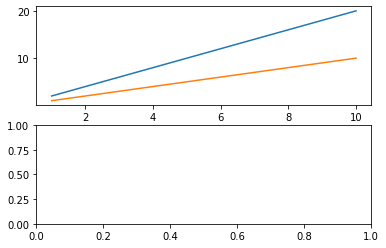

In [42]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,1)
z = x
axes[0].plot(x,y,x,z)

In [44]:
fig.savefig('./temp.png',dpi = fig.dpi)

In [10]:
y = [0.920000, 0.920000,0.911200,0.897500,0.870200,0.842500,0.798100,0.743200,0.689300,0.613400,0.550000,0.485600,0.409900,0.299800]
x = [i for i in range(1,15)]




In [11]:
y = y[::-1]
y



[0.2998,
 0.4099,
 0.4856,
 0.55,
 0.6134,
 0.6893,
 0.7432,
 0.7981,
 0.8425,
 0.8702,
 0.8975,
 0.9112,
 0.92,
 0.92]

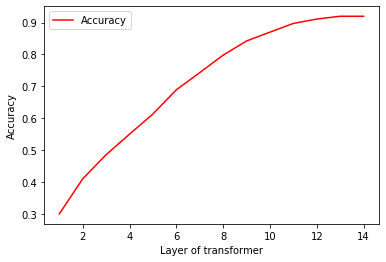

In [12]:
import matplotlib.pyplot as plt
plt.plot(x,y,'r-',label='Accuracy')
plt.xlabel('Layer of transformer')
plt.ylabel('Accuracy')
plt.legend()





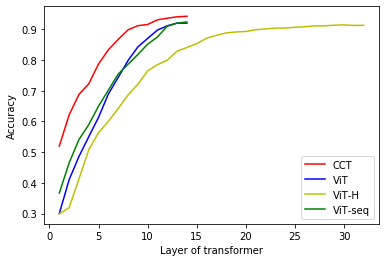

In [7]:
y = [0.9424, 0.9406, 0.936, 0.9307000000000001, 0.9157000000000001, 0.9116000000000001, 0.898, 0.8668, 0.8331000000000001, 0.7871, 0.7222000000000001, 0.6878000000000001, 0.6209, 0.5195000000000001]
y = y[::-1]
x = [i for i in range(1,15)]
z = [0.920000, 0.920000,0.911200,0.897500,0.870200,0.842500,0.798100,0.743200,0.689300,0.613400,0.550000,0.485600,0.409900,0.299800]
z = z[::-1]
h = [0.9021, 0.9036000000000001, 0.9028, 0.9032, 0.9013, 0.9013, 0.8994000000000001, 0.8982, 0.8967, 0.8974000000000001, 0.8972, 0.8948, 0.8923000000000001, 0.887, 0.8839, 0.8753000000000001, 0.8687, 0.8551000000000001, 0.8382000000000001, 0.8243, 0.7966000000000001, 0.7793, 0.7556, 0.7259, 0.6885, 0.6426000000000001, 0.6157, 0.5719000000000001, 0.5157, 0.4264, 0.33340000000000003, 0.3065]
h = h[::-1]
k = [i for i in range(1,33)]
l = [0.9238000000000001, 0.9201, 0.9101, 0.8749, 0.8514, 0.8178000000000001, 0.786, 0.7541, 0.7018, 0.6499, 0.5894, 0.5408000000000001, 0.46490000000000004, 0.36660000000000004]
l = l[::-1]
h2 = [0.9129, 0.9123, 0.9142, 0.9132, 0.9111, 0.9111, 0.9082, 0.9064000000000001, 0.904, 0.9037000000000001, 0.9012, 0.8985000000000001, 0.8927, 0.8913000000000001, 0.8882, 0.8803000000000001, 0.8708, 0.8532000000000001, 0.8408, 0.8285, 0.7992, 0.7847000000000001, 0.7647, 0.7208, 0.6859000000000001, 0.6421, 0.6003000000000001, 0.5633, 0.5074000000000001, 0.4126, 0.3189, 0.2988]
h2 = h2[::-1]
import matplotlib.pyplot as plt
plt.plot(x,y,'r-',label='CCT')
plt.plot(x,z,'b-',label='ViT')
plt.plot(k,h2,'y-',label='ViT-H')
plt.plot(x,l,'g-',label='ViT-seq')
plt.ylabel('Accuracy')
plt.xlabel('Layer of transformer')
plt.legend()

In [1]:
import torch
    


In [2]:
from models.ViTLite import ViTLite

In [5]:
model = ViTLite(num_classes = 100)

In [6]:
print(model)

ViTLite(
  (tokenizer): Tokenizer(
    (conv_layers): Sequential(
      (0): Sequential(
        (0): Conv2d(3, 256, kernel_size=(4, 4), stride=(4, 4))
        (1): Identity()
        (2): Identity()
      )
    )
    (flattener): Flatten(start_dim=2, end_dim=3)
  )
  (classifier): Transformer(
    (dropout): Dropout(p=0.1, inplace=False)
    (blocks): ModuleList(
      (0): TransformerEncoder(
        (pre_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (self_attn): Attention(
          (qkv): Linear(in_features=256, out_features=768, bias=False)
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=256, out_features=256, bias=True)
          (proj_drop): Dropout(p=0.1, inplace=False)
        )
        (linear1): Linear(in_features=256, out_features=512, bias=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (linear2): Linear(in_features=512, ou

In [1]:
from models import model_factory



In [2]:
model = model_factory.create_model("vit_lite_100")

In [3]:
print(model)

ViTLite(
  (tokenizer): Tokenizer(
    (conv_layers): Sequential(
      (0): Sequential(
        (0): Conv2d(3, 256, kernel_size=(4, 4), stride=(4, 4))
        (1): Identity()
        (2): Identity()
      )
    )
    (flattener): Flatten(start_dim=2, end_dim=3)
  )
  (classifier): Transformer(
    (dropout): Dropout(p=0.1, inplace=False)
    (blocks): ModuleList(
      (0): TransformerEncoder(
        (pre_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (self_attn): Attention(
          (qkv): Linear(in_features=256, out_features=768, bias=False)
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=256, out_features=256, bias=True)
          (proj_drop): Dropout(p=0.1, inplace=False)
        )
        (linear1): Linear(in_features=256, out_features=1024, bias=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (linear2): Linear(in_features=1024, 